# **Program 10**

Prepare a naïve bayes classification model for classification of email messages into spam or not spam.

Distribution of spam and ham messages:
 label
ham     4825
spam     747
Name: count, dtype: int64


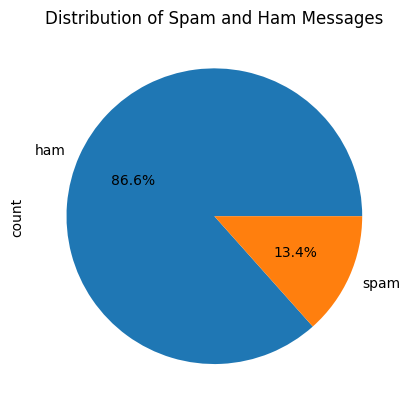

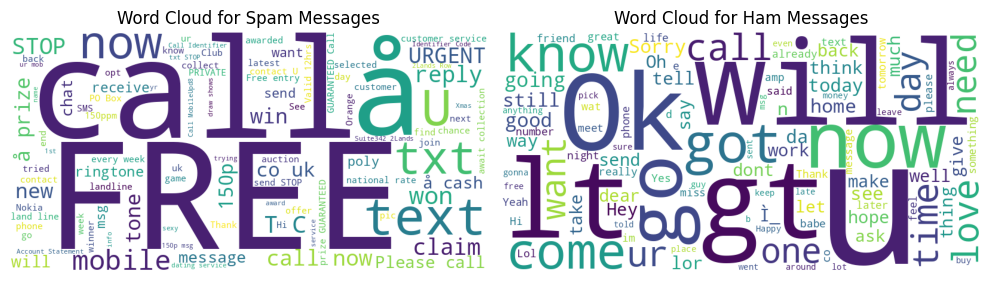

Accuracy for Multinomial Naive Bayes Model:  0.9838565022421525
Accuracy for Gaussian Naive Bayes Model:  0.9004484304932735


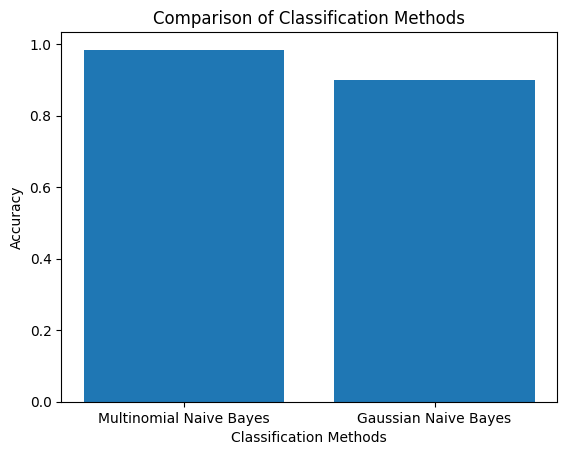

In [4]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset into a DataFrame with 'latin-1' encoding to avoid encoding issues
df = pd.read_csv('spam.csv', encoding='latin-1')

# Select only the relevant columns ('v1' as labels and 'v2' as messages) and rename them
df = df[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Define feature matrix 'x' as 'text' and target variable 'y' as 'label'
x=df['text']
y=df['label']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Find and plot the distribution of spam and ham messages
distribution = y.value_counts()
print("Distribution of spam and ham messages:\n", distribution)
distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Spam and Ham Messages")
plt.show()

# Generate a Wordcloud for the Spam emails
spam_text = ' '.join(df[df['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(spam_text)

# Generate a Wordcloud for the Ham emails
ham_text = ' '.join(df[df['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(ham_text)

# Plot the word clouds for spam messages
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
# Plot the wordcloud for ham messages
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
# Show both plots side by side
plt.tight_layout()
plt.show()

# Vectorize the text data to convert it into numerical features
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Train a Multinomial Naive Bayes classifier on the vectorized data
model_multinomial = MultinomialNB(alpha = 0.8, fit_prior = True, force_alpha = True)
model_multinomial.fit(x_train, y_train)

# Train a Gaussian Naive Bayes classifier on the vectorized data
model_gaussian = GaussianNB()
model_gaussian.fit(x_train.toarray(), y_train)

# Calculate and print the accuracy of both models on the test data
y_pred_multinomial = model_multinomial.predict(x_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Accuracy for Multinomial Naive Bayes Model: ", accuracy_multinomial)

y_pred_gaussian = model_gaussian.predict(x_test.toarray())
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Accuracy for Gaussian Naive Bayes Model: ", accuracy_gaussian)

# Plot a comparison of the accuracy scores for the two classification methods
methods = ["Multinomial Naive Bayes", "Gaussian Naive Bayes"]
scores = [accuracy_multinomial, accuracy_gaussian]
plt.bar(methods, scores)
plt.xlabel("Classification Methods")
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Methods")
plt.show()